In [8]:
words = open('names.txt', 'r').read().splitlines()

In [9]:
len(words)
min((len(w) for w in words)), max(len(w) for w in words)
l_ = [len(w) for w in words]
words[l_.index(min(l_))], words[l_.index(max(l_))]

('an', 'muhammadibrahim')

Character level language model, is predicting the next language in a sequence given concrete sequence of characters precedding it

### Bi-gram Model
Only look at the preceding word to make predictions

In [10]:
# from collections import defaultdict
# prob = defaultdict(lambda: defaultdict(int))
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

arr = np.zeros((28,28),dtype=int)
for word in words:
    word = [chr(96)] + list(word) + [chr(123)]
    for pre, w in zip(word, word[1:]):
        # prob[pre][w] += 1
        i = ord(w) - 96 # row number
        j = ord(pre) - 96 # col number
        arr[j][i] += 1

names = ['<start>']+ [chr(i) for i in range(97, 123)] + ['<end>']
df = pd.DataFrame(arr, columns=names, index=names )
# ord('a') - 96

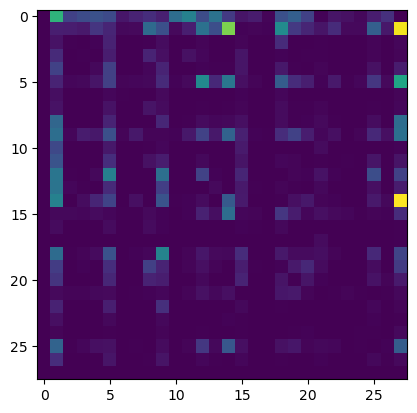

In [11]:
torch.tensor(arr)

plt.imshow(arr)

<Axes: >

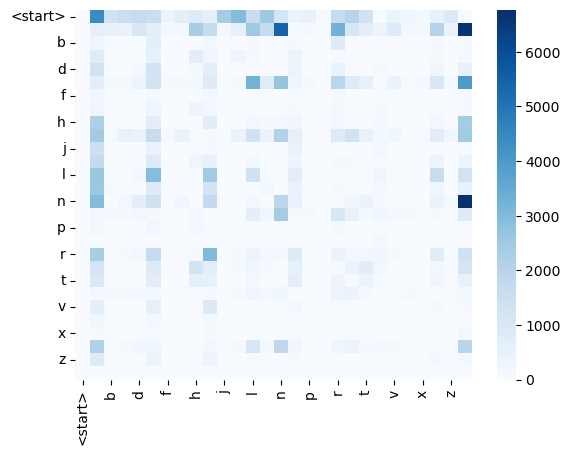

In [21]:
import seaborn as sns
annot = True
sns.heatmap(df, cmap='Blues')

#### Use same token for start and end

In [25]:
arr = torch.zeros((27,27),dtype=int)
for word in words:
    word = [chr(96)] + list(word) + [chr(96)]
    for pre, w in zip(word, word[1:]):
        # prob[pre][w] += 1
        i = ord(w) - 96 # row number
        j = ord(pre) - 96 # col number
        arr[j][i] += 1

names = ['.']+ [chr(i) for i in range(97, 123)]
df = pd.DataFrame(arr, columns=names, index=names )

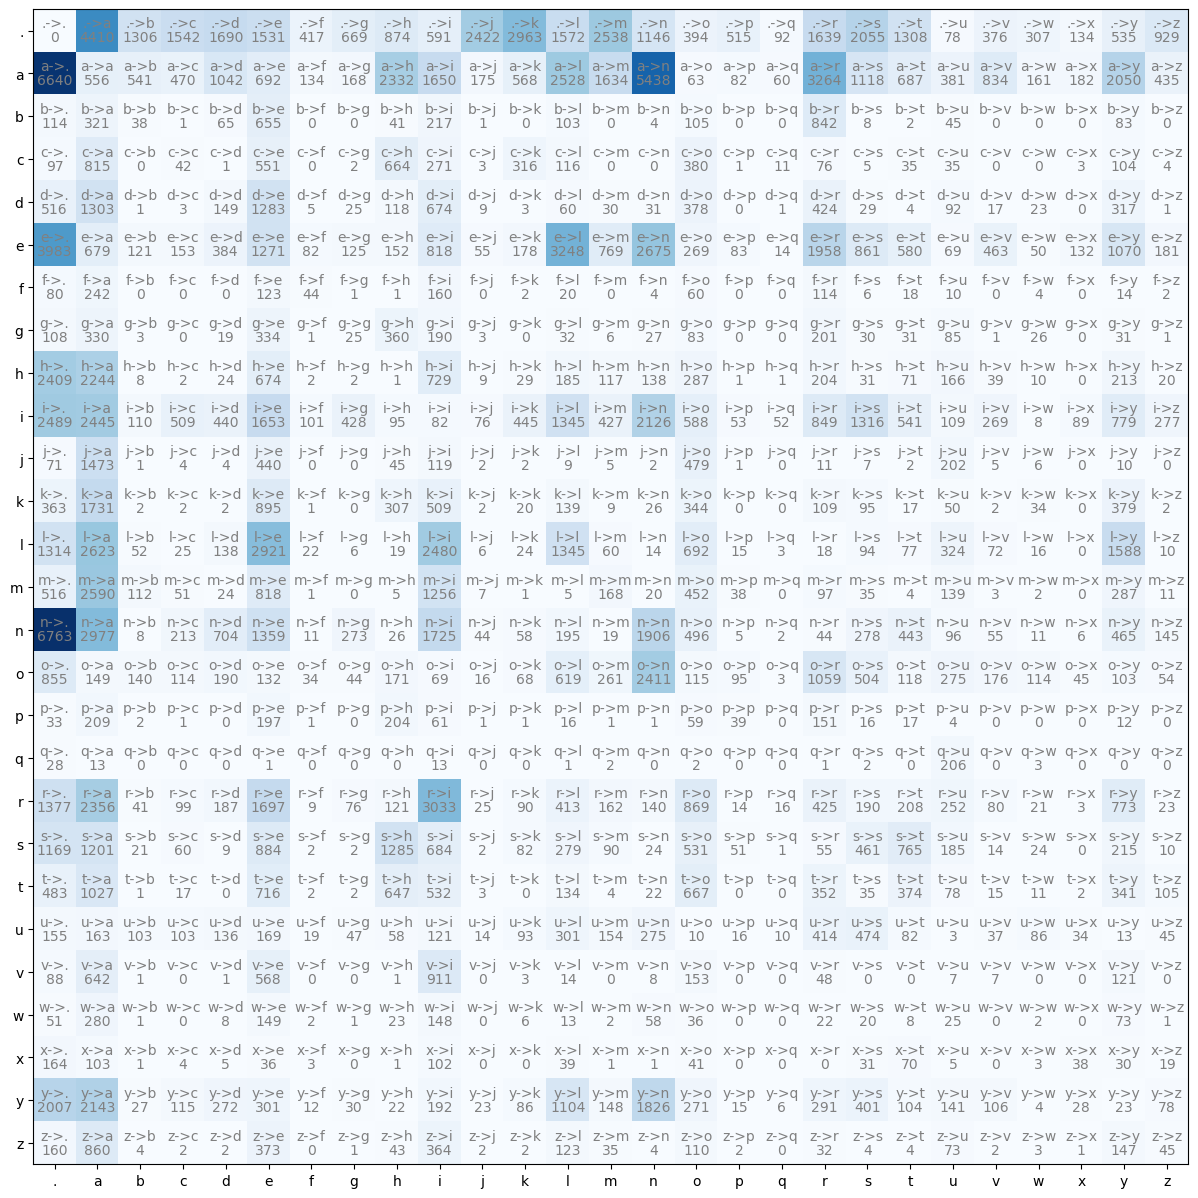

In [47]:
def idx_to_str(i):
    return chr(i+96) if i !=0 else '.'

plt.figure(figsize = (15,15))
plt.imshow(arr, cmap='Blues')
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        chstr = idx_to_str(j) + "->" + idx_to_str(i)
        plt.text(i,j, chstr, ha='center', va='bottom', color='gray')
        plt.text(i,j, arr[j,i].item(), ha='center', va='top', color='gray')
plt.xticks(np.arange(arr.shape[0]),labels=names)
plt.yticks(np.arange(arr.shape[0]),labels=names)
plt.show()

In [104]:
arr2 = arr.float() / torch.sum(arr.float(),axis=1, keepdim=True)

In [103]:
g = torch.Generator().manual_seed(2147483647)
bigram = []
for i in range(20):
    ix = 0
    word = ''
    while True:
        # p = arr[ix].float() # take the row of counts for the chosen letter
        # p = p / p.sum() # get probability
        p = arr2[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        word += idx_to_str(ix)
        if ix == 0:
            break
    bigram.append(word)
bigram

['mor.',
 'axx.',
 'minaymoryles.',
 'kondlaisah.',
 'anchshizarie.',
 'odaren.',
 'iaddash.',
 'h.',
 'jhinatien.',
 'egushl.',
 'h.',
 'br.',
 'a.',
 'jayn.',
 'ilemannariaenien.',
 'be.',
 'f.',
 'akiinela.',
 'trttanakeroruceyaaxatona.',
 'lamoynayrkiedengin.']

In [115]:
log_likelihood = 0
n = 0
for word in words:
    word = [chr(96)] + list(word) + [chr(96)]
    for pre, w in zip(word, word[1:]):
        # prob[pre][w] += 1
        i = ord(w) - 96 # row number
        j = ord(pre) - 96 # col number
        prob = arr2[j,i]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{pre}{w}: {prob:.4f}{logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'avg negative log likelihood: {nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
avg negative log likelihood: 2.454094171524048


#### NN model